<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Exercise (18)</h1>
<h2 style="color:#800080;text-align:center;">DBSCAN Clustering</h2>

<b>Question</b>
<li>Apply DBSCAN clustering to the Seeds dataset [https://archive.ics.uci.edu/ml/datasets/seeds]  (Download from Moodle), you also need to:</li>
<li>Apply pre-processing if needed.</li>
<li>Analyze and visualize the results.</li>
<ul><li>How many clusters were produced?</li>
<li>Does the dataset contain outliers?</li>
<li>If the k-nearest neighbour matrix distance is applied, will the number of clusters change?</li></ul>
<li>Evaluate the clustering results.</li>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
dt = pd.read_csv('seeds.csv')
dt

,area A,perimeter P,compactness C,ength of kerne,width of kernel,asymmetry coefficient,ength of kernel groove,varieties of wheat
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area A                  210 non-null    float64
 1   perimeter P             210 non-null    float64
 2   compactness C           210 non-null    float64
 3   ength of kerne          210 non-null    float64
 4   width of kernel         210 non-null    float64
 5   asymmetry coefficient   210 non-null    float64
 6   ength of kernel groove  210 non-null    float64
 7   varieties of wheat      210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [5]:
dt.describe()

,area A,perimeter P,compactness C,ength of kerne,width of kernel,asymmetry coefficient,ength of kernel groove,varieties of wheat
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


cluster group
-1    180
 0     30
Name: count, dtype: int64


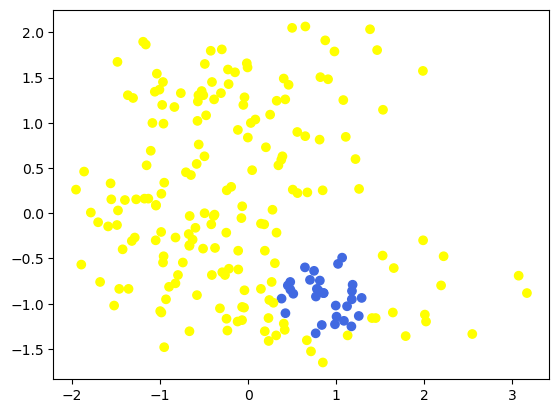

In [67]:
from pandas import Series, DataFrame
from sklearn.cluster import DBSCAN
X = dt.iloc[:, [5, 1]].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=30, metric='euclidean')
clusters = dbscan.fit_predict(X)
clusters = dbscan.labels_
dt['cluster group'] = Series(clusters, index=dt.index)
print(dt['cluster group'].value_counts())
colors = ['royalblue', 'maroon', 'yellow']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(clusters))

In [35]:
# The labels_ property contains the list of clusters and their respective points


In [36]:

dt

,area A,perimeter P,compactness C,ength of kerne,width of kernel,asymmetry coefficient,ength of kernel groove,varieties of wheat,cluster group
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,2


In [38]:
dt['cluster group'].value_counts()

cluster group
0    70
1    70
2    70
Name: count, dtype: int64

In [40]:
colors = ['royalblue', 'maroon', 'yellow']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

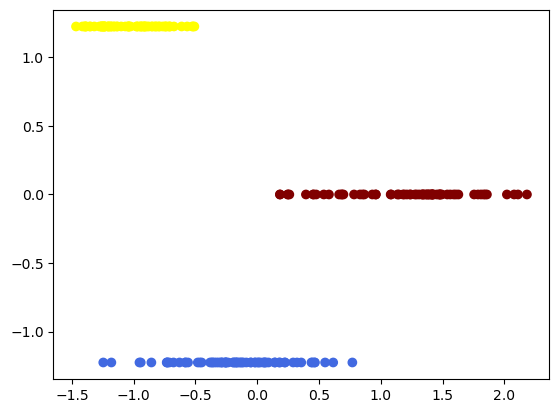

In [41]:
plt.scatter(X[:, 0], X[:,1], c=vectorizer(clusters))